# Miejsce na importy

In [16]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Ustawienia graficzne wykresów

In [17]:
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"]="--"

# Zadanie 6

#### Celem zadania była weryfikacja praw arcusa sinusa.

#### Pierwsze prawo arcusa sinusa: czas spędzony przez proces Wienera powyżej osi OX na odcinku [0,1] ma rozkład arcusa sinusa.

#### Drugie prawo arcusa sinusa: Ostatni moment uderzenia procesu Wienera na odicnku [0,1] w oś OX ma rozkład arcusa sinusa.

#### Trzecie prawo arcusa sinusa: Moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0,1] ma rozkład arcusa sinusa.

Definiujemy funkcję generującą proces Wienera oraz funkcje gęstości i dystrybuanty rozkładu arcusa sinusa.

In [18]:
def W(t:float, dt:float=1e-4) -> np.array:
    """ Generates trajectory of Wiener Proccess.

    Parameters:
    t(float) - time
    dt(float) - (default 1e-4)

    Returns:
    np.array: trajectory of Wiener Proccess

    Example:
    >>> W(5)
    array([0.        , 0.01556342, 0.00663036, ..., 2.13422048, 2.13954468,
       2.12184202])
    """
    N = int(round(t / dt))
    X = np.cumsum(np.sqrt(dt) * np.random.randn(N-1))
    return np.hstack((0, X))

In [19]:
def arcsin_pdf(x:float) -> float:
    """ Calculates arcsin pdf value for given point.

    Parameters:
    x(float) - point

    Returns:
    float: arcsin pdf value for given point

    Example:
    >>> arcsin_pdf(0.5)
    0.63661977
    """
    if 0 < x < 1:
        return 1 / (np.pi * np.sqrt(x * (1 - x)))
    else:
        return 0

arcsin_pdf = np.vectorize(arcsin_pdf)

In [20]:
def arcsin_cdf(x:float) -> float:
    """ Calculates arcsin cdf value for given point.

    Parameters:
    x(float) - point

    Returns:
    float: arcsin cdf value for given point

    Example:
    >>> arcsin_cdf(0.3)
    0.36901012
    """
    if x < 0:
        return 0
    elif x > 1:
        return 1
    else:
        return 2/np.pi * np.arcsin(np.sqrt(x))

arcsin_cdf = np.vectorize(arcsin_cdf)

W pętli wyznaczamy poszukiwane wartości.

In [21]:
dt = 1e-4
M = 1000
Tpluss = np.zeros(M)
Ls = np.zeros(M)
Wms = np.zeros(M)

for i in range(M):
    X = W(1, dt=dt)
    Tplus = np.sum(X > 0) * dt
    Tpluss[i] = Tplus
    L = np.where((X[:-1] * X[1:]) <= 0)[0][-1] * dt
    Ls[i] = L
    Wm = np.argmax(X) * dt
    Wms[i] = Wm

Następnie porównujemy otrzymane histogramy z wykresem gęstości rozkładu arcusa sinusa, by zweryfikować poprawność symulacji.

In [22]:
x_axis = np.linspace(0,1,100)
theoretical_pdf = np.linspace(0,1,100)
for i in range(len(theoretical_pdf)):
    theoretical_pdf[i] = arcsin_pdf(x_axis[i])

Text(0.5, 0, 'values')

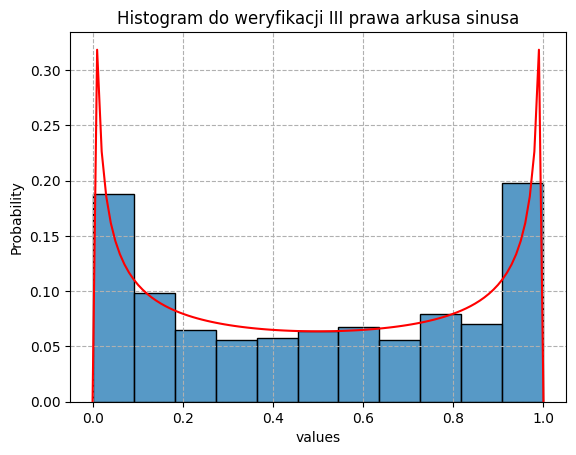

In [23]:
sns.histplot(Wms, stat="probability")
plt.plot(x_axis, theoretical_pdf/10, 'r') #divided by 10 to make it easier to read (high values on edges)
plt.title("Histogram do weryfikacji III prawa arkusa sinusa")
plt.xlabel("values")

Text(0.5, 0, 'values')

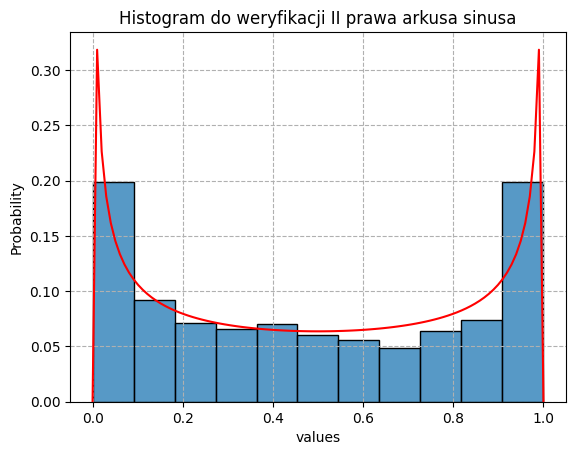

In [24]:
plt.plot(x_axis, theoretical_pdf/10, 'r') #divided by 10 to make it easier to read (high values on edges)
sns.histplot(Ls,stat="probability")
plt.title("Histogram do weryfikacji II prawa arkusa sinusa")
plt.xlabel("values")

Text(0.5, 0, 'values')

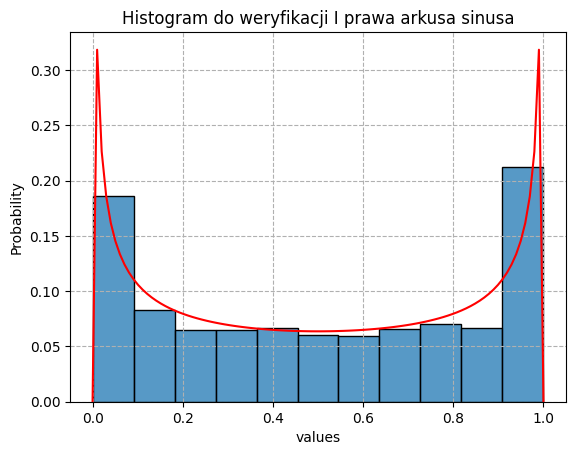

In [25]:
sns.histplot(Tpluss, stat="probability")
plt.plot(x_axis, theoretical_pdf/10, 'r') #divided by 10 to make it easier to read (high values on edges)
plt.title("Histogram do weryfikacji I prawa arkusa sinusa")
plt.xlabel("values")

Następnie porównujemy dystrybuanty empiryczne z uzyskanych próbek wraz z dystrybuantą teoretyczną rozkładu arcusa sinusa,

In [26]:
x_axis = np.linspace(0,1,1000)
theoretical_cdf = np.linspace(0,1,1000)
for i in range(len(theoretical_cdf)):
    theoretical_cdf[i] = arcsin_cdf(x_axis[i])

Text(0.5, 0, 'values')

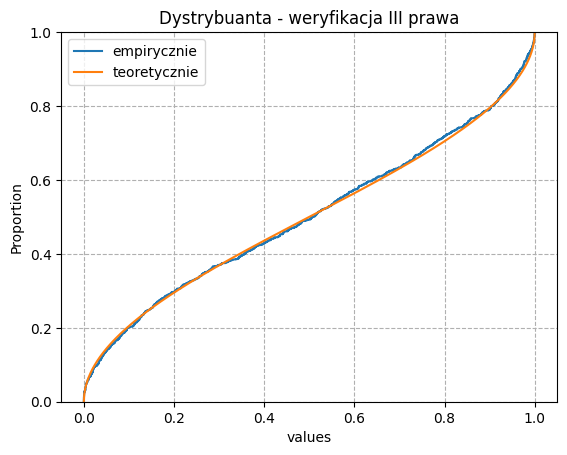

In [27]:
plt.title("Dystrybuanta - weryfikacja III prawa")
sns.ecdfplot(Wms, label = "empirycznie")
plt.plot (x_axis, theoretical_cdf, label = "teoretycznie")
plt.legend()
plt.xlabel("values")

Text(0.5, 0, 'values')

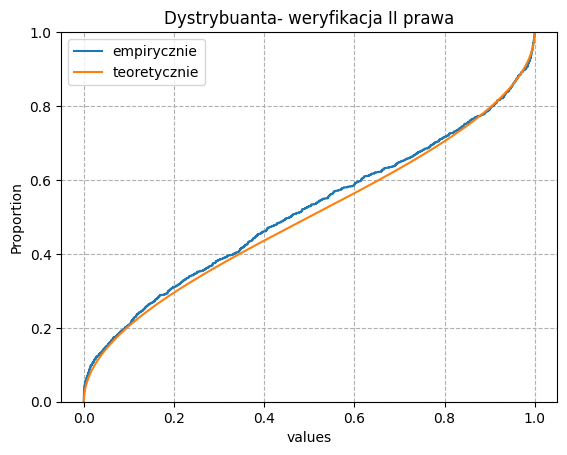

In [28]:
plt.title("Dystrybuanta- weryfikacja II prawa")
sns.ecdfplot(Ls, label = "empirycznie")
plt.plot(x_axis, theoretical_cdf, label = "teoretycznie")
plt.legend()
plt.xlabel("values")

Text(0.5, 0, 'values')

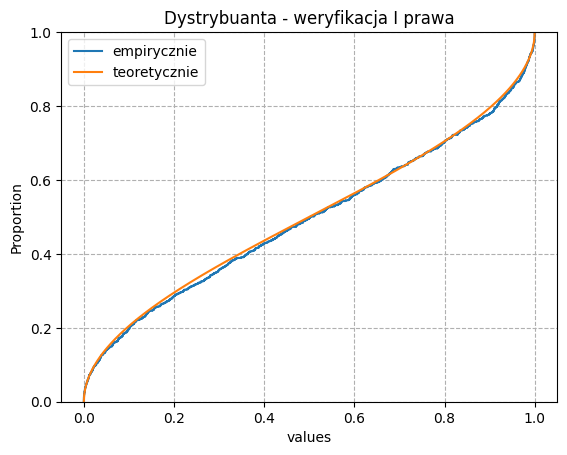

In [29]:
plt.title("Dystrybuanta - weryfikacja I prawa")
sns.ecdfplot(Tpluss, label = "empirycznie")
plt.plot(x_axis, theoretical_cdf, label = "teoretycznie")
plt.legend()
plt.xlabel("values")

#### Wnioski:
Porównanie zarówno histogramów otrzymanych próbek do gęstości teoretycznej rozkładu arcusa sinusa oraz dystrybuant empirycznych do dystrybuanty teoretycznej wykazały zgodność dla wszystkich trzech praw arcusa sinusa.